In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
pixel_data = pd.read_csv('data/mnist_784_zip/data/mnist_784_csv.csv')

In [93]:
pixel_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [95]:
# target = np.array([i[-1] for i in pixel_data.columns])
# target[:5]
target = pixel_data['class'].values

target[:5]

array([5, 0, 4, 1, 9])

In [96]:
pixel_data.drop('class',axis=1, inplace=True)

In [113]:
images = np.array([im.reshape(28, 28) for im in pixel_data.values])

display pixel

In [116]:
def display_pixel(pixel_data_, pixel_index=0):
    plt.imshow(pixel_data_.iloc[pixel_index].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

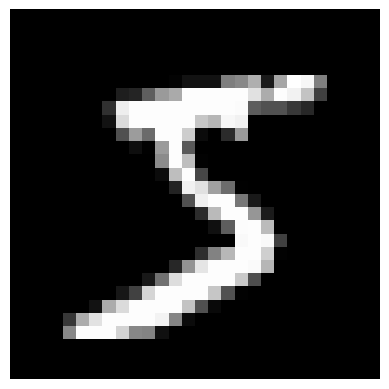

In [101]:
display_pixel(pixel_data, 0)


In [121]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

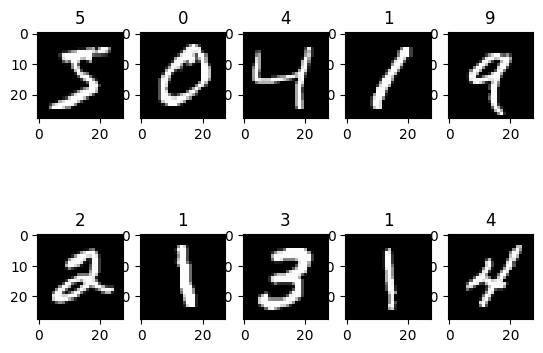

In [102]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pixel_data.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title("Digit: ",target[i])

plt.show()

Extract the features

In [134]:
from skimage.feature import hog
from skimage import exposure


In [133]:
features = hog(images[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

In [136]:
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(features, in_range=(0, 10))

In [175]:
# Parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Extract HOG features for each image
hog_features = []
for image in images:
    
    # Reshape image to its original dimensions (assuming it was flattened)
    image = image.reshape(28, 28)
    
    # Extract HOG features
    (_, features) = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block, visualize=True)

    # Convert the HOG features to a numpy array.
    features = np.array(features)

    # Append the HOG features to the list.
    hog_features.append(features)

# Convert the list to a numpy array
hog_features = np.array(hog_features)

# Print the shape of the extracted HOG features
print("HOG features shape:", hog_features.shape)

HOG features shape: (70000, 28, 28)


visualize the resulting HOG image

In [ ]:
from skimage import exposure
from skimage import feature

In [203]:
n=67

In [204]:
hogImage = exposure.rescale_intensity(hog_features[n], out_range=(0, 255))
hogImage = hogImage.astype("uint8")

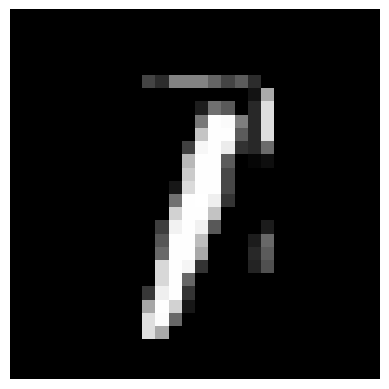

Actual


In [205]:
imshow(images[n])
print('Actual')

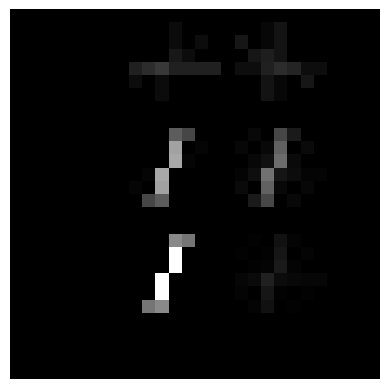

HOG


In [206]:
imshow(hogImage)
print('HOG')

In [211]:
# flatten the images
n_samples = len(hog_features)
data = hog_features.reshape((n_samples, -1))

In [212]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)


In [214]:
X_train.shape

(52500, 784)

In [213]:
y_train.shape

(52500,)

In [226]:
from sklearn import metrics

In [243]:
from sklearn.svm import SVC

# Train an SVM classifier on the training set.
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set.
y_pred = svm.predict(X_test)


In [245]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9737142857142858

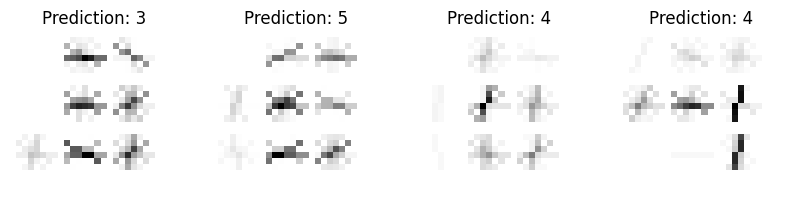

In [246]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28,28,1)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

classification_report builds a text report showing the main classification metrics.

In [247]:
print(
    f"Classification report for classifier {svm}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1803
           1       0.99      0.99      0.99      1902
           2       0.97      0.97      0.97      1745
           3       0.97      0.97      0.97      1806
           4       0.97      0.98      0.97      1683
           5       0.98      0.98      0.98      1592
           6       0.99      0.99      0.99      1773
           7       0.96      0.96      0.96      1813
           8       0.97      0.96      0.97      1680
           9       0.96      0.96      0.96      1703

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500




Confusion matrix:
[[1789    1    1    0    2    1    6    0    2    1]
 [   0 1880   10    0    5    0    1    2    0    4]
 [   0    5 1694   20    3    2    0   16    5    0]
 [   5    0   12 1744    1   12    0    9   11   12]
 [   1    3    2    0 1642    0    4   12    2   17]
 [   2    1    1   14    2 1558    8    0    3    3]
 [   3    5    1    0    7    6 1748    0    3    0]
 [   1    4   19    9   18    1    0 1739    3   19]
 [  10    2    1    9    5   10    4    5 1617   17]
 [   4    1    0    1   16    5    2   27   18 1629]]


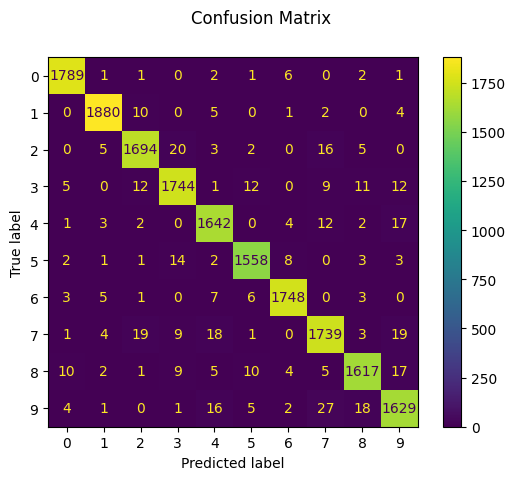

In [248]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()